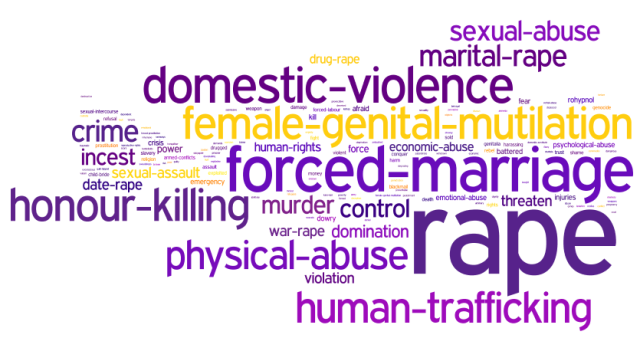

We are going to analyze the crimes against women between 2001 to 2014.
For this we are going to use the simple python libraries i.e., pandas, seaborn and matplotlib.

In [ ]:
#importing necessary libraries

#for mathematical calculations
import numpy as np

#for data manipulation
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for adding interactivity
from ipywidgets import interact

In [ ]:
#Reading the dataset and checking the shape of the data

crimes = pd.read_csv('../input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv')
crimes.shape

In [ ]:
#checking for the columns present in the datase

crimes.columns

In [ ]:
#Let's check the head of the data

crimes.head()

In [ ]:
#lets check if there are any missing values
crimes.isnull().sum()

By looking at the column names, we can observe that the two columns "Assault on women with intent to outrage her modesty" and "Insult to modesty of women" have same meaning. These two crimes are same given different names. So we will combine these two columns and name the new column as "Assault to modesty".

In [ ]:
#creating new column
crimes['Assault to modesty'] = crimes['Assault on women with intent to outrage her modesty'] + crimes['Insult to modesty of Women']

In [ ]:
#dropping the other two columns from the dataset
crimes = crimes.drop(['Assault on women with intent to outrage her modesty','Insult to modesty of Women'],axis=1)
crimes.columns

In [ ]:
#let's check the unique states and the union territories in the data

pd.set_option('max_rows',72)
crimes['STATE/UT'].value_counts()

#we can observe that various names of the states are duplicated. So, before proceeding further we will clean the state/ut column

We can clearly observe that the names of the states are duplicated. So we will keep the unique state names in our analysis using the replace function.

In [ ]:
crimes['STATE/UT'] = crimes['STATE/UT'].replace(('UTTAR PRADESH','UTTARAKHAND','A & N ISLANDS','CHANDIGARH','D & N HAVELI',
                                                'LAKSHADWEEP','PUDUCHERRY','DAMAN & DIU','GOA','SIKKIM','TELANGANA',
                                                'TRIPURA','MIZORAM','MANIPUR','MEGHALAYA','NAGALAND','CHANDIGARH',
                                                'HIMACHAL PRADESH','ARUNACHAL PRADESH','Delhi UT','KERALA',
                                                'HARYANA','JHARKHAND','ANDHRA PRADESH','CHHATTISGARH','PUNJAB','SIKKIM',
                                                'WEST BENGAL','ASSAM','JAMMU & KASHMIR','KARNATAKA','ODISHA',
                                                'GUJARAT','TAMIL NADU','RAJASTHAN','BIHAR','MAHARASHTRA','A&N Islands',
                                                 'MADHYA PRADESH','DELHI'),
                                                
                                               ('Uttar Pradesh','Uttarakhand','A & N Islands','Chandigarh','D&N Haveli',
                                               'Lakshadweep','Puducherry','Daman & Diu','Goa','Sikkim','Telangana','Tripura',
                                               'Mizoram','Manipur','Meghalaya','Nagaland','Chandigarh','Himachal Pradesh',
                                               'Arunachal Pradesh','Delhi','Kerala','Haryana','Jharkhand','Andhra Pradesh',
                                               'Chhattisgarh','Punjab','Sikkim','West Bengal','Assam','Jammu & Kashmir',
                                                'Karnataka','Odisha','Gujarat','Tamil Nadu','Rajasthan','Bihar','Maharashtra',
                                               'A & N Islands','Madhya Pradesh','Delhi'))

In [ ]:
crimes['STATE/UT'].value_counts()

## Analyzing Rape cases in India between 2001 and 2014

In [ ]:
#Let's first analyze the Rape cases in different states of India

crimes.groupby(['STATE/UT'])['Rape'].agg(['min','max','sum']).style.background_gradient(
    cmap='Wistia')

1. Maximum cases have been reported in Madhya Pradesh which are around 90k.
2. Lakshadweep is the UT where only 20 cases have been reported between 2001 and 2014.

In [ ]:
#checking the top 5 and bottom 5 states/ut with maximum and minimum number of Rape cases 
#in any particular year
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
a = crimes.groupby(['Year','STATE/UT'])[['Rape']].sum().sort_values(by = 'Rape',
                                                                    ascending=False).head(5)
a = a.reset_index()
sns.barplot(a['STATE/UT'],a['Rape'], hue=a['Year'],color='Red')
plt.title('Top 5 states/ut with maximum number of rape cases')

plt.subplot(1,2,2)
b = crimes.groupby(['Year','STATE/UT'])[['Rape']].sum().sort_values(by = 'Rape').head(5)
b = b.reset_index()
sns.barplot(b['STATE/UT'],b['Rape'], hue=b['Year'])
plt.title('Top 5 states/ut with minimum number of rape cases')
plt.show()

In [ ]:
# Let's check in which year there were most and least number of cases

crimes.groupby(['Year'])['Rape'].agg(['min','max','sum']).style.background_gradient(cmap='copper')

1. We can see that there is no year when a single case did not happen.
2. There are more than 32000 cases reported in each year.
2. We can observe that the number of cases are just have been increasing over the years.
3. The maximum number of Rape cases are reported in 2014 which are even more than 70000 which is unbelievable and shameful.

In [ ]:
#let's check the number of cases in each state year wise

@interact
def cases_state_year(state = list(crimes['STATE/UT'].value_counts().index)):
    a = crimes[crimes['STATE/UT']==state]
    b = a.groupby('Year')['Rape'].sum()
    return b

Using the above interactive function, the number of cases in each state year wise can be seen.

## Kidnapping and Abduction cases in India between 2001 and 2014

In [ ]:
crimes.groupby(['STATE/UT'])['Kidnapping and Abduction'].agg(['min','max','sum']).style.background_gradient(cmap='Wistia')

1. Maximum kidnapping cases were reported in Uttar Pradesh.
2. Least kidnapping and abduction cases i.e., 2 were reported in Lakshadweep in between 2001 and 2014.

In [ ]:
# Let's check in which year there were most and least number of cases

crimes.groupby(['Year'])['Kidnapping and Abduction'].agg(['min','max','sum']).style.background_gradient(cmap='copper')

1. The kidnapping and abduction cases have just been increasing over the years.
2. In 2014, total 114622 cases were reported.

In [ ]:
#let's check the number of cases in each state year wise

@interact
def cases_state_year(state = list(crimes['STATE/UT'].value_counts().index)):
    a = crimes[crimes['STATE/UT']==state]
    b = a.groupby('Year')['Kidnapping and Abduction'].sum()
    return b

In [ ]:
#checking the top 5 and bottom 5 states/ut with maximum ans minimum number of Kidnapping and abduction cases 
#in any particular year
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
a = crimes.groupby(['Year','STATE/UT'])[['Kidnapping and Abduction']].sum().sort_values(by = 'Kidnapping and Abduction',
                                                                    ascending=False).head(5)
a = a.reset_index()
sns.barplot(a['STATE/UT'],a['Kidnapping and Abduction'], hue=a['Year'])
plt.title('Top 5 states/ut with maximum number of Kidnapping and Abduction cases')

plt.subplot(1,2,2)
b = crimes.groupby(['Year','STATE/UT'])[['Kidnapping and Abduction']].sum().sort_values(by = 'Kidnapping and Abduction').head(5)
b = b.reset_index()
sns.barplot(b['STATE/UT'],b['Kidnapping and Abduction'], hue=b['Year'])
plt.title('Top 5 states/ut with minimum number of Kidnapping and Abduction cases')
plt.show()

## Dowy Deaths cases in India between 2001 and 2014

In [ ]:
crimes.groupby(['STATE/UT'])['Dowry Deaths'].agg(['min','max','mean','sum']).style.background_gradient(cmap='Wistia')

1. No doubt maximum number of dowry deaths are reported in Uttar Pradesh.
2. No cases of dowry deaths reported in Lakshadweep.
3. We can also observe that very less number of dowry deaths reported in North East states of India compared to all other states and union territories of India.

In [ ]:
# Let's check in which year there were most and least number of cases

crimes.groupby(['Year'])['Dowry Deaths'].agg(['min','max','sum']).style.background_gradient(cmap='copper')

In [ ]:
#let's check the number of cases in each state year wise

@interact
def cases_state_year(state = list(crimes['STATE/UT'].value_counts().index)):
    a = crimes[crimes['STATE/UT']==state]
    b = a.groupby('Year')['Dowry Deaths'].sum()
    return b

In [ ]:
#checking the top 5 and bottom 5 states/ut with maximum ans minimum number of dowry deaths cases 
#in any particular year
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
a = crimes.groupby(['Year','STATE/UT'])[['Dowry Deaths']].sum().sort_values(by = 'Dowry Deaths',
                                                                    ascending=False).head(5)
a = a.reset_index()
sns.barplot(a['STATE/UT'],a['Dowry Deaths'], hue=a['Year'])
plt.title('Top 5 states/ut with maximum number of Dowry Deaths cases')

plt.subplot(1,2,2)
b = crimes.groupby(['Year','STATE/UT'])[['Dowry Deaths']].sum().sort_values(by = 'Dowry Deaths').head(5)
b = b.reset_index()
sns.barplot(b['STATE/UT'],b['Dowry Deaths'], hue=b['Year'])
plt.title('Top 5 states/ut with minimum number of Dowry Deaths cases')
plt.show()

## Assault on women with intent to outrage her modesty

In [ ]:
crimes.groupby(['STATE/UT'])['Assault to modesty'].agg(['min','max','mean','sum']).style.background_gradient(cmap='Wistia')

In [ ]:
#checking the top 5 and bottom 5 states/ut with maximum ans minimum number of Assault to modesty cases 
#in any particular year
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
a = crimes.groupby(['Year','STATE/UT'])[['Assault to modesty']].sum().sort_values(by = 
                                                                                  'Assault to modesty',
                                                                    ascending=False).head(5)
a = a.reset_index()
sns.barplot(a['STATE/UT'],a['Assault to modesty'], hue=a['Year'])
plt.title('Top 5 states/ut with maximum number of Assault to modesty of Women')

plt.subplot(1,2,2)
b = crimes.groupby(['Year','STATE/UT'])[['Assault to modesty']].sum().sort_values(by =
                                                                                  'Assault to modesty').head(5)
b = b.reset_index()
sns.barplot(b['STATE/UT'],b['Assault to modesty'], hue=b['Year'])
plt.title('Top 5 states/ut with minimum number of Assault to modesty of women')
plt.show()

In [ ]:
# Let's check in which year there were most and least number of cases

crimes.groupby(['Year'])['Assault to modesty'].agg(['min','max','sum']).style.background_gradient(cmap='copper')

In [ ]:
#let's check the number of cases in each state year wise

@interact
def cases_state_year(state = list(crimes['STATE/UT'].value_counts().index)):
    a = crimes[crimes['STATE/UT']==state]
    b = a.groupby('Year')['Assault to modesty'].sum()
    return b

## Cruelty by Husband or his Relatives

In [ ]:
crimes.groupby(['STATE/UT'])['Cruelty by Husband or his Relatives'].agg(['min','max','mean','sum']).style.background_gradient(cmap='Wistia')

In [ ]:
#checking the top 5 and bottom 5 states/ut with maximum ans minimum number of Cruelty by husband cases 
#in any particular year
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
a = crimes.groupby(['Year','STATE/UT'])[['Cruelty by Husband or his Relatives']].sum().sort_values(by = 
                                                                                  'Cruelty by Husband or his Relatives',
                                                                    ascending=False).head(5)
a = a.reset_index()
sns.barplot(a['STATE/UT'],a['Cruelty by Husband or his Relatives'], hue=a['Year'])
plt.title('Top 5 states/ut with maximum number of Cruelty by Husband or his Relatives')

plt.subplot(1,2,2)
b = crimes.groupby(['Year','STATE/UT'])[['Cruelty by Husband or his Relatives']].sum().sort_values(by =
                                                                                  'Cruelty by Husband or his Relatives').head(5)
b = b.reset_index()
sns.barplot(b['STATE/UT'],b['Cruelty by Husband or his Relatives'], hue=b['Year'])
plt.title('Top 5 states/ut with minimum number of Cruelty by Husband or his Relatives')
plt.show()

In [ ]:
# Let's check in which year there were most and least number of cases

crimes.groupby(['Year'])['Cruelty by Husband or his Relatives'].agg(['min','max','sum']).style.background_gradient(cmap='copper')

In [ ]:
#let's check the number of cases in each state year wise

@interact
def cases_state_year(state = list(crimes['STATE/UT'].value_counts().index)):
    a = crimes[crimes['STATE/UT']==state]
    b = a.groupby('Year')['Cruelty by Husband or his Relatives'].sum()
    return b

## Importation of Girls

In [ ]:
crimes.groupby(['STATE/UT'])['Importation of Girls'].agg(['min','max','mean','sum']).style.background_gradient(cmap='Wistia')

1. Bihar is the state with maximum number of cases reported for Importation of Girls.
2. West Bengal, Madhya Pradesh and Jharkhand also have high number of cases.

In [ ]:
#checking the top 5 and bottom 5 states/ut with maximum ans minimum number of Importation of girls cases 
#in any particular year
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
a = crimes.groupby(['Year','STATE/UT'])[['Importation of Girls']].sum().sort_values(by = 
                                                                                  'Importation of Girls',
                                                                    ascending=False).head(5)
a = a.reset_index()
sns.barplot(a['STATE/UT'],a['Importation of Girls'], hue=a['Year'])
plt.title('Top 5 states/ut with maximum number of Importation of Girls')

plt.subplot(1,2,2)
b = crimes.groupby(['Year','STATE/UT'])[['Importation of Girls']].sum().sort_values(by =
                                                                                  'Importation of Girls').head(5)
b = b.reset_index()
sns.barplot(b['STATE/UT'],b['Importation of Girls'], hue=b['Year'])
plt.title('Top 5 states/ut with minimum number of Importation of Girls')
plt.show()

In [ ]:
# Let's check in which year there were most and least number of cases

crimes.groupby(['Year'])['Importation of Girls'].agg(['min','max','sum']).style.background_gradient(cmap='copper')

In [ ]:
#let's check the number of cases in each state year wise

@interact
def cases_state_year(state = list(crimes['STATE/UT'].value_counts().index)):
    a = crimes[crimes['STATE/UT']==state]
    b = a.groupby('Year')['Importation of Girls'].sum()
    return b

Now let's analyze the total number of crimes committed against women in any state and any year.

In [ ]:
crimes['Total_cases'] = crimes['Rape']+crimes['Kidnapping and Abduction']+crimes['Dowry Deaths']+crimes['Cruelty by Husband or his Relatives']+crimes['Importation of Girls']+crimes['Assault to modesty']

In [ ]:
crimes.head()

In [ ]:
#checking the top 5 and bottom 5 states/ut with maximum ans minimum number of cases 
#in any particular year
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
a = crimes.groupby(['STATE/UT'])[['Total_cases']].sum().sort_values(by ='Total_cases',
                                                                    ascending=False).head(5)
a = a.reset_index()
sns.barplot(a['STATE/UT'],a['Total_cases'])
plt.title('Top 5 states/ut with maximum number of crimes against women')

plt.subplot(1,2,2)
b = crimes.groupby(['STATE/UT'])[['Total_cases']].sum().sort_values(by =
                                                                                  'Total_cases').head(5)
b = b.reset_index()
sns.barplot(b['STATE/UT'],b['Total_cases'])
plt.title('Top 5 states/ut with minimum number of crimes against women')
plt.show()

1. Uttar Pradesh, Andhra Pradesh, West Bengal,Rajasthan and Madhya Pradesh are the top 5 states where maximum number of crime cases against women are reported.
2. Lakshadweep is the UT where least number of cases are reported.